# Rareness

## Get All Functions from All Phases and Groups

In [1]:
import pandas as pd
import numpy as np
import math
import collections

%store -r overall_phase1
%store -r overall_phase2
%store -r overall_phase3
%store -r overall_phase4
%store -r overall_phase5


%store -r subset_bogota0_phase1
%store -r subset_bogota0_phase2
%store -r subset_bogota0_phase3
%store -r overall_phase3_bogota0
%store -r subset_bogota0_phase4
%store -r overall_phase4_bogota0
%store -r overall_phase5_bogota0
%store -r subset_bogota0_phase5
%store -r subset_bogota1_phase1
%store -r subset_bogota1_phase2
%store -r subset_bogota1_phase3
%store -r overall_phase3_bogota1
%store -r overall_phase4_bogota1
%store -r overall_phase5_bogota1
%store -r subset_bogota1_phase5
%store -r subset_bogota1_phase4
%store -r subset_bogota2_phase1
%store -r subset_bogota2_phase2
%store -r subset_bogota2_phase3
%store -r overall_phase3_bogota2
%store -r overall_phase4_bogota2
%store -r overall_phase5_bogota2
%store -r subset_bogota2_phase5
%store -r subset_bogota3_phase1
%store -r overall_phase1_bogota3
%store -r overall_phase2_bogota3
%store -r subset_bogota3_phase3
%store -r overall_phase3_bogota3
%store -r overall_phase4_bogota3
%store -r overall_phase5_bogota3
%store -r subset_bogota2_phase4

%store -r overall_phase2_bogota0
%store -r overall_phase2_bogota1
%store -r overall_phase2_bogota2
%store -r overall_phase2_bogota3

%store -r overall_phase1_bogota0
%store -r overall_phase1_bogota1
%store -r overall_phase1_bogota2
%store -r overall_phase1_bogota3

In [2]:
## List the 20,000 least common functions in a counter

overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
overall_23 = overall_12.append(overall_phase3, ignore_index=True)
overall_34 = overall_23.append(overall_phase4, ignore_index=True)
overall_45 = overall_34.append(overall_phase5, ignore_index=True)
new_list = overall_45['functions'].explode().to_list()
new_list = list(filter(None, new_list))
new_list

['.ready',
 '.click',
 '.mcheck',
 '.on',
 '.closest',
 '.list',
 '.find',
 '.form',
 '.toggleClass',
 '.val',
 'document.getElementById',
 'google.maps.Map',
 '.getJSON',
 'test.json',
 'bootstrap.min.css',
 'theme.min.css',
 'jquery.min.js',
 'bootstrap.min.js',
 'js.js',
 'jsondata.js',
 'css.css',
 'style.css',
 'map.js',
 'document.getElementById',
 'google.maps.Map',
 'google.maps.Marker',
 'bootstrap.min.css',
 'style.css',
 '.JS',
 '.js',
 nan,
 'jquery.min.js',
 '.js',
 'Rent.js',
 'Crimes.js',
 'google.maps.Map',
 'document.getElementById',
 '.ajax',
 'data.cityofchicago.org',
 'xi.json',
 '.done',
 'data.length',
 'google.maps.Marker',
 'google.maps.LatLng',
 '.latitude',
 '.longitude',
 '.primary',
 'crimeMarker.push',
 'crimeMarker.length',
 '.setMap',
 'google.maps.InfoWindow',
 'google.maps.event.addListener',
 'infowindow.close',
 'infowindow.setContent',
 'data.primary',
 'infowindow.open',
 'marker.get',
 '.innerHTML',
 'data.id',
 'data.date',
 'data.description',
 '

In [3]:
str1 = [x for x in new_list if str(x) != 'nan']
str1

['.ready',
 '.click',
 '.mcheck',
 '.on',
 '.closest',
 '.list',
 '.find',
 '.form',
 '.toggleClass',
 '.val',
 'document.getElementById',
 'google.maps.Map',
 '.getJSON',
 'test.json',
 'bootstrap.min.css',
 'theme.min.css',
 'jquery.min.js',
 'bootstrap.min.js',
 'js.js',
 'jsondata.js',
 'css.css',
 'style.css',
 'map.js',
 'document.getElementById',
 'google.maps.Map',
 'google.maps.Marker',
 'bootstrap.min.css',
 'style.css',
 '.JS',
 '.js',
 'jquery.min.js',
 '.js',
 'Rent.js',
 'Crimes.js',
 'google.maps.Map',
 'document.getElementById',
 '.ajax',
 'data.cityofchicago.org',
 'xi.json',
 '.done',
 'data.length',
 'google.maps.Marker',
 'google.maps.LatLng',
 '.latitude',
 '.longitude',
 '.primary',
 'crimeMarker.push',
 'crimeMarker.length',
 '.setMap',
 'google.maps.InfoWindow',
 'google.maps.event.addListener',
 'infowindow.close',
 'infowindow.setContent',
 'data.primary',
 'infowindow.open',
 'marker.get',
 '.innerHTML',
 'data.id',
 'data.date',
 'data.description',
 'data.y

In [4]:
global_functions = {'Student': 'all', 'functions': [str1], 'phase': 0}
global_functions = pd.DataFrame(data=global_functions)
global_functions

,Student,functions,phase
0,all,"[.ready, .click, .mcheck, .on, .closest, .list...",0


## Append Global Functions with Bogota 0 Phase 5

In [5]:
subset_bogota0_phase5_all = subset_bogota0_phase5.append(global_functions, ignore_index=True)
subset_bogota0_phase5_all

,Student,functions,phase
0,fffeelipe,"[.ready, .click, .css, .removeClass, .is, .val...",5
1,mnguzmanc,"[house.ico, style.css, .css, main.js, map.js, ...",5
2,jmcuestasb,"[js.org, .v, .min.js, weather.js, myss.css, bo...",5
3,katherinsb,"[reset.css, layout.css, style.css, jquery.min....",5
4,jjrodriguezn,"[google.maps.Map, document.getElementById, goo...",5
5,DglyP,"[bootstrap.min.css, style.css, jquery.min.js, ...",5
6,cap182,[],5
7,Judgarciani,"[bootstrap.min.css, jquery.min.js, bootstrap.m...",5
8,sacastroc,"[bootstrap.min.css, theme.min.css, jquery.min....",5
9,pcberriop,"[Map.js, .js, main.css, avatar.jpg, pcberriop....",5


In [6]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase5_all["functions"], subset_bogota0_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase5_compare_all = pd.DataFrame(result)
subset_bogota0_phase5_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.014280
1,fffeelipe,jmcuestasb,0.005329
2,fffeelipe,katherinsb,0.009644
3,fffeelipe,jjrodriguezn,0.041958
4,fffeelipe,DglyP,0.012500
...,...,...,...
698,MogGy94,odprietoh,1.000000
699,MogGy94,all,0.000000
700,yocuervoc,odprietoh,1.000000
701,yocuervoc,all,0.000000


In [7]:
subset_bogota0_phase5_all_only = subset_bogota0_phase5_compare_all.loc[subset_bogota0_phase5_compare_all['user2'] == 'all']
subset_bogota0_phase5_all_only

,user1,user2,similarity
36,fffeelipe,all,0.000559
72,mnguzmanc,all,0.011071
107,jmcuestasb,all,0.033984
141,katherinsb,all,0.011037
174,jjrodriguezn,all,0.000149
206,DglyP,all,0.011143
237,cap182,all,0.000000
267,Judgarciani,all,0.001012
296,sacastroc,all,0.000386
324,pcberriop,all,0.000434


## Append Global Functions with Bogota 0 Phase 4

In [8]:
subset_bogota0_phase4_all = subset_bogota0_phase4.append(global_functions, ignore_index=True)
print(subset_bogota0_phase4_all)

           Student                                          functions  phase
0        fffeelipe  [.ready, .click, .removeClass, .is, .val, .che...      4
1        mnguzmanc  [house.ico, style.css, .css, main.js, map.js, ...      4
2       jmcuestasb  [js.org, .v, .min.js, weather.js, mycss.css, b...      4
3       katherinsb  [reset.css, layout.css, style.css, .js, yui.js...      4
4     jjrodriguezn  [google.maps.Map, document.getElementById, goo...      4
5            DglyP  [bootstrap.min.css, style.css, jquery.min.js, ...      4
6           cap182                                                 []      4
7      Judgarciani  [bootstrap.min.css, jquery.min.js, bootstrap.m...      4
8        sacastroc  [js.org, .v, .min.js, collection.v, dispatch.v...      4
9        pcberriop  [jquery.min.js, Map.js, main.css, avatar.jpg, ...      4
10     hsmartineza  [jquery.min.js, .js, map.js, house.js, weather...      4
11        Moimolcp  [bootstrap.min.css, style.css, script.js, jque...      4

In [9]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase4_all["functions"], subset_bogota0_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase4_compare_all = pd.DataFrame(result)
subset_bogota0_phase4_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.013525
1,fffeelipe,jmcuestasb,0.005054
2,fffeelipe,katherinsb,0.032000
3,fffeelipe,jjrodriguezn,0.046154
4,fffeelipe,DglyP,0.010959
...,...,...,...
698,MogGy94,odprietoh,1.000000
699,MogGy94,all,0.000000
700,yocuervoc,odprietoh,1.000000
701,yocuervoc,all,0.000000


In [10]:
subset_bogota0_phase4_all_only = subset_bogota0_phase4_compare_all.loc[subset_bogota0_phase4_compare_all['user2'] == 'all']
subset_bogota0_phase4_all_only

,user1,user2,similarity
36,fffeelipe,all,0.000511
72,mnguzmanc,all,0.011037
107,jmcuestasb,all,0.033984
141,katherinsb,all,0.000101
174,jjrodriguezn,all,0.000135
206,DglyP,all,0.013707
237,cap182,all,0.000000
267,Judgarciani,all,0.000665
296,sacastroc,all,0.000390
324,pcberriop,all,0.000318


## Append Global Functions with Bogota 0 Phase 3

In [11]:
subset_bogota0_phase3_all = subset_bogota0_phase3.append(global_functions, ignore_index=True)
print(subset_bogota0_phase3_all)

           Student                                          functions  phase
0        fffeelipe  [.ready, .click, .mcheck, .on, .closest, .list...      3
1        mnguzmanc  [house.ico, style.css, .css, main.js, map.js, ...      3
2       jmcuestasb  [js.org, .v, .min.js, weather.js, mycss.css, b...      3
3       katherinsb                                                 []      3
4     jjrodriguezn  [google.maps.Map, document.getElementById, goo...      3
5            DglyP  [google.maps.Map, document.getElementById, goo...      3
6           cap182                                                 []      3
7      Judgarciani  [bootstrap.min.css, jquery.min.js, bootstrap.m...      3
8        sacastroc  [js.org, .v, .min.js, collection.v, dispatch.v...      3
9        pcberriop  [google.maps.Map, document.getElementById, goo...      3
10     hsmartineza  [jquery.min.js, .js, map.js, info.js, test.js,...      3
11        Moimolcp  [bootstrap.min.css, style.css, script.js, jque...      3

In [12]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase3_all["functions"], subset_bogota0_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase3_compare_all = pd.DataFrame(result)
subset_bogota0_phase3_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.004357
1,fffeelipe,jmcuestasb,0.001980
2,fffeelipe,katherinsb,0.032258
3,fffeelipe,jjrodriguezn,0.113208
4,fffeelipe,DglyP,0.272727
...,...,...,...
698,MogGy94,odprietoh,1.000000
699,MogGy94,all,0.000000
700,yocuervoc,odprietoh,1.000000
701,yocuervoc,all,0.000000


In [13]:
subset_bogota0_phase3_all_only = subset_bogota0_phase3_compare_all.loc[subset_bogota0_phase3_compare_all['user2'] == 'all']
subset_bogota0_phase3_all_only

,user1,user2,similarity
36,fffeelipe,all,0.000145
72,mnguzmanc,all,0.010955
107,jmcuestasb,all,0.033984
141,katherinsb,all,0.000000
174,jjrodriguezn,all,0.000130
206,DglyP,all,0.000116
237,cap182,all,0.000000
267,Judgarciani,all,0.000641
296,sacastroc,all,0.000347
324,pcberriop,all,0.000198


## Append Global Functions with Bogota 0 Phase 2

In [14]:
subset_bogota0_phase2_all = subset_bogota0_phase2.append(global_functions, ignore_index=True)
print(subset_bogota0_phase2_all)

           Student                                          functions  phase
0        fffeelipe  [.ready, .click, .mcheck, .on, .closest, .list...      2
1        mnguzmanc  [house.ico, style.css, map.js, Chicago.jpg, do...      2
2       jmcuestasb  [js.org, .v, .min.js, weather.js, mycss.css, b...      2
3       katherinsb                                                 []      2
4     jjrodriguezn  [data.cityofchicago.org, rows.json, .ajax, goo...      2
5            DglyP  [google.maps.Map, document.getElementById, goo...      2
6           cap182                                                 []      2
7      Judgarciani  [bootstrap.min.css, jquery.min.js, bootstrap.m...      2
8        sacastroc  [js.org, .v, .min.js, collection.v, dispatch.v...      2
9        pcberriop  [google.maps.Map, document.getElementById, goo...      2
10     hsmartineza  [jquery.min.js, .js, info.js, chicago.jpg, doc...      2
11        Moimolcp  [style.css, script.js, jquery.min.js, google.m...      2

In [15]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase2_all["functions"], subset_bogota0_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase2_compare_all = pd.DataFrame(result)
subset_bogota0_phase2_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.117647
1,fffeelipe,jmcuestasb,0.001980
2,fffeelipe,katherinsb,0.032258
3,fffeelipe,jjrodriguezn,0.214286
4,fffeelipe,DglyP,0.272727
...,...,...,...
698,MogGy94,odprietoh,1.000000
699,MogGy94,all,0.000000
700,yocuervoc,odprietoh,1.000000
701,yocuervoc,all,0.000000


In [16]:
subset_bogota0_phase2_all_only = subset_bogota0_phase2_compare_all.loc[subset_bogota0_phase2_compare_all['user2'] == 'all']
subset_bogota0_phase2_all_only

,user1,user2,similarity
36,fffeelipe,all,0.000145
72,mnguzmanc,all,0.000120
107,jmcuestasb,all,0.033984
141,katherinsb,all,0.000000
174,jjrodriguezn,all,0.000092
206,DglyP,all,0.000116
237,cap182,all,0.000000
267,Judgarciani,all,0.000386
296,sacastroc,all,0.000202
324,pcberriop,all,0.000198


## Append Global Functions with Bogota 0 Phase 1

In [17]:
subset_bogota0_phase1_all = subset_bogota0_phase1.append(global_functions, ignore_index=True)
print(subset_bogota0_phase1_all)

           Student                                          functions  phase
0        fffeelipe  [.ready, .click, .mcheck, .on, .closest, .list...      1
1        mnguzmanc  [style.css, map.js, document.getElementById, g...      1
2       jmcuestasb                                                 []      1
3       katherinsb                                                 []      1
4     jjrodriguezn                                                 []      1
5            DglyP         [bootstrap.min.css, style.css, .JS, .js, ]      1
6           cap182                                                 []      1
7      Judgarciani  [jquery.min.js, .js, Rent.js, Crimes.js, googl...      1
8        sacastroc  [js.org, .v, .min.js, bootstrap.min.css, theme...      1
9        pcberriop  [google.maps.Map, document.getElementById, goo...      1
10     hsmartineza  [jquery.min.js, .js, info.js, document.getElem...      1
11        Moimolcp  [style.css, script.js, jquery.min.js, google.m...      1

In [18]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase1_all["functions"], subset_bogota0_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase1_compare_all = pd.DataFrame(result)
subset_bogota0_phase1_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.120000
1,fffeelipe,jmcuestasb,0.045455
2,fffeelipe,katherinsb,0.045455
3,fffeelipe,jjrodriguezn,0.045455
4,fffeelipe,DglyP,0.080000
...,...,...,...
698,MogGy94,odprietoh,1.000000
699,MogGy94,all,0.000000
700,yocuervoc,odprietoh,1.000000
701,yocuervoc,all,0.000000


In [19]:
subset_bogota0_phase1_all_only = subset_bogota0_phase1_compare_all.loc[subset_bogota0_phase1_compare_all['user2'] == 'all']
subset_bogota0_phase1_all_only

,user1,user2,similarity
36,fffeelipe,all,0.000101
72,mnguzmanc,all,0.000024
107,jmcuestasb,all,0.000000
141,katherinsb,all,0.000000
174,jjrodriguezn,all,0.000000
206,DglyP,all,0.000019
237,cap182,all,0.000000
267,Judgarciani,all,0.000193
296,sacastroc,all,0.000034
324,pcberriop,all,0.000193


## Append Global Functions with Bogota 1 Phase 5

In [20]:
subset_bogota1_phase5_all = subset_bogota1_phase5.append(global_functions, ignore_index=True)
print(subset_bogota1_phase5_all)

           Student                                          functions  phase
0        gasierram  [illinois.edu, favicon.ico, bootstrap.min.css,...      5
1     adamantwharf  [document.getElementById, google.maps.Map, goo...      5
2        bdcajicam  [nearium.css, .js, nearium.js, google.maps.Map...      5
3   andfsanchezlem                                                 []      5
4      dfhincapiem  [main.js, google.maps.Map, document.getElement...      5
5        helmeraac  [styles.css, jquery.min.js, integration.js, sc...      5
6       dasalgadob  [bootstrap.min.css, theme.min.css, jquery.min....      5
7       falperezgo  [.ajax, data.cityofchicago.org, rows.json, .do...      5
8        djguzmanc  [google.maps.LatLng, google.maps.Map, document...      5
9       gsuarezc04  [google.maps.LatLng, google.maps.MapTypeId.ROA...      5
10          oeroaq  [.css, style.css, bootstrap.css, balloon.css, ...      5
11         gcantem                                                 []      5

In [21]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase5_all["functions"], subset_bogota1_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase5_compare_all = pd.DataFrame(result)
subset_bogota1_phase5_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.064516
1,gasierram,bdcajicam,0.523077
2,gasierram,andfsanchezlem,0.016129
3,gasierram,dfhincapiem,0.080645
4,gasierram,helmeraac,0.102273
...,...,...,...
815,ItsNavi,JairVillalba,0.016393
816,ItsNavi,all,0.000000
817,Zeugmax,JairVillalba,0.016393
818,Zeugmax,all,0.000000


In [22]:
subset_bogota1_phase5_all_only = subset_bogota1_phase5_compare_all.loc[subset_bogota1_phase5_compare_all['user2'] == 'all']
subset_bogota1_phase5_all_only

,user1,user2,similarity
39,gasierram,all,0.000294
78,adamantwharf,all,0.000014
116,bdcajicam,all,0.000174
153,andfsanchezlem,all,0.000000
189,dfhincapiem,all,0.000019
224,helmeraac,all,0.000164
258,dasalgadob,all,0.000043
291,falperezgo,all,0.009683
323,djguzmanc,all,0.000313
354,gsuarezc04,all,0.000198


## Append Global Functions with Bogota 1 Phase 4

In [23]:
subset_bogota1_phase4_all = subset_bogota1_phase4.append(global_functions, ignore_index=True)
print(subset_bogota1_phase4_all)

           Student                                          functions  phase
0        gasierram  [illinois.edu, favicon.ico, bootstrap.min.css,...      4
1     adamantwharf  [document.getElementById, google.maps.Map, goo...      4
2        bdcajicam  [nearium.css, .js, nearium.js, google.maps.Map...      4
3   andfsanchezlem                                                 []      4
4      dfhincapiem  [main.js, google.maps.Map, document.getElement...      4
5        helmeraac  [styles.css, jquery.min.js, integration.js, sc...      4
6       dasalgadob  [bootstrap.min.css, theme.min.css, jquery.min....      4
7       falperezgo  [.ajax, data.cityofchicago.org, rows.json, .do...      4
8        djguzmanc  [google.maps.LatLng, google.maps.Map, document...      4
9       gsuarezc04  [google.maps.LatLng, google.maps.MapTypeId.ROA...      4
10          oeroaq  [.css, style.css, bootstrap.css, balloon.css, ...      4
11         gcantem  [window.XMLHttpRequest, Microsoft.XMLHTTP, xml...      4

In [24]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase4_all["functions"], subset_bogota1_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase4_compare_all = pd.DataFrame(result)
subset_bogota1_phase4_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.064516
1,gasierram,bdcajicam,0.523077
2,gasierram,andfsanchezlem,0.016129
3,gasierram,dfhincapiem,0.080645
4,gasierram,helmeraac,0.102273
...,...,...,...
815,ItsNavi,JairVillalba,0.027027
816,ItsNavi,all,0.000000
817,Zeugmax,JairVillalba,0.027027
818,Zeugmax,all,0.000000


In [25]:
subset_bogota1_phase4_all_only = subset_bogota1_phase4_compare_all.loc[subset_bogota1_phase4_compare_all['user2'] == 'all']
subset_bogota1_phase4_all_only

,user1,user2,similarity
39,gasierram,all,0.000294
78,adamantwharf,all,0.000014
116,bdcajicam,all,0.000174
153,andfsanchezlem,all,0.000000
189,dfhincapiem,all,0.000019
224,helmeraac,all,0.000164
258,dasalgadob,all,0.000043
291,falperezgo,all,0.009654
323,djguzmanc,all,0.000313
354,gsuarezc04,all,0.000198


## Append Global Functions with Bogota 1 Phase 3

In [26]:
subset_bogota1_phase3_all = subset_bogota1_phase3.append(global_functions, ignore_index=True)
print(subset_bogota1_phase3_all)

           Student                                          functions  phase
0        gasierram  [illinois.edu, favicon.ico, bootstrap.min.css,...      3
1     adamantwharf  [document.getElementById, google.maps.Map, goo...      3
2        bdcajicam  [nearium.css, .js, nearium.js, google.maps.Map...      3
3   andfsanchezlem                                                 []      3
4      dfhincapiem  [main.js, google.maps.Map, document.getElement...      3
5        helmeraac  [styles.css, jquery.min.js, scripts.js, integr...      3
6       dasalgadob  [bootstrap.min.css, theme.min.css, jquery.min....      3
7       falperezgo  [materialize.css, materialize.js, materialize....      3
8        djguzmanc  [google.maps.LatLng, google.maps.Map, document...      3
9       gsuarezc04  [google.maps.LatLng, google.maps.MapTypeId.ROA...      3
10          oeroaq  [style.css, bootstrap.css, balloon.css, jquery...      3
11         gcantem  [bootstrap.min.css, theme.min.css, jquery.min....      3

In [27]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase3_all["functions"], subset_bogota1_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase3_compare_all = pd.DataFrame(result)
subset_bogota1_phase3_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.064516
1,gasierram,bdcajicam,0.523077
2,gasierram,andfsanchezlem,0.016129
3,gasierram,dfhincapiem,0.080645
4,gasierram,helmeraac,0.083333
...,...,...,...
815,ItsNavi,JairVillalba,0.029412
816,ItsNavi,all,0.000000
817,Zeugmax,JairVillalba,0.029412
818,Zeugmax,all,0.000000


In [28]:
subset_bogota1_phase3_all_only = subset_bogota1_phase3_compare_all.loc[subset_bogota1_phase3_compare_all['user2'] == 'all']
subset_bogota1_phase3_all_only

,user1,user2,similarity
39,gasierram,all,0.000294
78,adamantwharf,all,0.000014
116,bdcajicam,all,0.000174
153,andfsanchezlem,all,0.000000
189,dfhincapiem,all,0.000019
224,helmeraac,all,0.000072
258,dasalgadob,all,0.000043
291,falperezgo,all,0.009370
323,djguzmanc,all,0.000241
354,gsuarezc04,all,0.000198


## Append Global Functions with Bogota 1 Phase 2

In [29]:
subset_bogota1_phase2_all = subset_bogota1_phase2.append(global_functions, ignore_index=True)
print(subset_bogota1_phase2_all)

           Student                                          functions  phase
0        gasierram  [illinois.edu, favicon.ico, bootstrap.min.css,...      2
1     adamantwharf  [document.getElementById, google.maps.Map, goo...      2
2        bdcajicam  [google.maps.Map, document.getElementById, goo...      2
3   andfsanchezlem                                                 []      2
4      dfhincapiem  [main.js, google.maps.Map, document.getElement...      2
5        helmeraac  [styles.css, jquery.min.js, scripts.js, integr...      2
6       dasalgadob  [bootstrap.min.css, theme.min.css, jquery.min....      2
7       falperezgo  [materialize.css, materialize.js, materialize....      2
8        djguzmanc  [google.maps.LatLng, google.maps.Map, document...      2
9       gsuarezc04  [google.maps.LatLng, google.maps.MapTypeId.ROA...      2
10          oeroaq  [style.css, bootstrap.css, jquery.js, bootstra...      2
11         gcantem  [bootstrap.min.css, theme.min.css, jquery.min....      2

In [30]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase2_all["functions"], subset_bogota1_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase2_compare_all = pd.DataFrame(result)
subset_bogota1_phase2_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.222222
1,gasierram,bdcajicam,0.222222
2,gasierram,andfsanchezlem,0.055556
3,gasierram,dfhincapiem,0.277778
4,gasierram,helmeraac,0.172414
...,...,...,...
815,ItsNavi,JairVillalba,0.041667
816,ItsNavi,all,0.000000
817,Zeugmax,JairVillalba,0.041667
818,Zeugmax,all,0.000000


In [31]:
subset_bogota1_phase2_all_only = subset_bogota1_phase2_compare_all.loc[subset_bogota1_phase2_compare_all['user2'] == 'all']
subset_bogota1_phase2_all_only

,user1,user2,similarity
39,gasierram,all,0.000082
78,adamantwharf,all,0.000014
116,bdcajicam,all,0.000014
153,andfsanchezlem,all,0.000000
189,dfhincapiem,all,0.000019
224,helmeraac,all,0.000072
258,dasalgadob,all,0.000043
291,falperezgo,all,0.009370
323,djguzmanc,all,0.000217
354,gsuarezc04,all,0.000198


## Append Global Functions with Bogota 1 Phase 1

In [32]:
subset_bogota1_phase1_all = subset_bogota1_phase1.append(global_functions, ignore_index=True)
print(subset_bogota1_phase1_all)

           Student                                          functions  phase
0        gasierram  [illinois.edu, favicon.ico, bootstrap.min.css,...      1
1     adamantwharf  [document.getElementById, google.maps.Map, goo...      1
2        bdcajicam  [google.maps.Map, document.getElementById, goo...      1
3   andfsanchezlem                                                 []      1
4      dfhincapiem                                                 []      1
5        helmeraac  [styles.css, scripts.js, integration.js, googl...      1
6       dasalgadob  [bootstrap.min.css, theme.min.css, jquery.min....      1
7       falperezgo  [materialize.min.css, materialize.min.js, .min...      1
8        djguzmanc  [google.maps.LatLng, google.maps.Map, document...      1
9       gsuarezc04                                                 []      1
10          oeroaq  [style.css, bootstrap.min.css, jquery.js, boot...      1
11         gcantem  [bootstrap.min.css, theme.min.css, jquery.min....      1

In [33]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase1_all["functions"], subset_bogota1_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase1_compare_all = pd.DataFrame(result)
subset_bogota1_phase1_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.222222
1,gasierram,bdcajicam,0.222222
2,gasierram,andfsanchezlem,0.055556
3,gasierram,dfhincapiem,0.055556
4,gasierram,helmeraac,0.190476
...,...,...,...
815,ItsNavi,JairVillalba,0.200000
816,ItsNavi,all,0.000000
817,Zeugmax,JairVillalba,0.200000
818,Zeugmax,all,0.000000


In [34]:
subset_bogota1_phase1_all_only = subset_bogota1_phase1_compare_all.loc[subset_bogota1_phase1_compare_all['user2'] == 'all']
subset_bogota1_phase1_all_only

,user1,user2,similarity
39,gasierram,all,0.000082
78,adamantwharf,all,0.000014
116,bdcajicam,all,0.000014
153,andfsanchezlem,all,0.000000
189,dfhincapiem,all,0.000000
224,helmeraac,all,0.000029
258,dasalgadob,all,0.000043
291,falperezgo,all,0.000101
323,djguzmanc,all,0.000164
354,gsuarezc04,all,0.000000


## Append Global Functions with Bogota 2 Phase 5

In [35]:
subset_bogota2_phase5_all = subset_bogota2_phase5.append(global_functions, ignore_index=True)
print(subset_bogota2_phase5_all)

            Student                                          functions  phase
0      jusherrerama  [js.org, .v, .min.js, bootstrap.min.css, portf...      5
1           bdvegat  [js.org, .v, .js, bootstrap.min.css, bootstrap...      5
2        Phoenixest  [a.active, .active, document.getElementById, g...      5
3          HashNick  [jquery.min.js, bootstrap.min.js, .js, js.org,...      5
4           ccvacad  [bootstrap.min.css, jquery.min.js, bootstrap.m...      5
5        joaortizro  [document.getElementById, google.maps.Map, boo...      5
6   juasmartinezbel  [bootstrap.min.css, jquery.min.js, .js, js.org...      5
7          mdbelloc  [jquery.min.js, bootstrap.min.js, tutorial.css...      5
8       diegocruz10  [bootstrap.min.css, awesome.min.css, theme.min...      5
9        crarojasca                                                 []      5
10           sagilm  [data.cityofchicago.org, rows.json, xmlhttp.op...      5
11         idrojasf  [components.css, responsee.css, owl.carouse

In [36]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase5_all["functions"], subset_bogota2_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase5_compare_all = pd.DataFrame(result)
subset_bogota2_phase5_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.003530
1,jusherrerama,Phoenixest,0.001767
2,jusherrerama,HashNick,0.006066
3,jusherrerama,ccvacad,0.004701
4,jusherrerama,joaortizro,0.003077
...,...,...,...
856,CSebasGomez,jscontrerasp,0.034483
857,CSebasGomez,all,0.000000
858,jhcardenasa,jscontrerasp,0.034483
859,jhcardenasa,all,0.000000


In [37]:
subset_bogota2_phase5_all_only = subset_bogota2_phase5_compare_all.loc[subset_bogota2_phase5_compare_all['user2'] == 'all']
subset_bogota2_phase5_all_only

,user1,user2,similarity
40,jusherrerama,all,0.010897
80,bdvegat,all,0.000053
119,Phoenixest,all,0.000024
157,HashNick,all,0.000284
194,ccvacad,all,0.000424
230,joaortizro,all,0.000092
265,juasmartinezbel,all,0.000978
299,mdbelloc,all,0.000255
332,diegocruz10,all,0.000193
364,crarojasca,all,0.000000


## Append Global Functions with Bogota 2 Phase 4

In [38]:
subset_bogota2_phase4_all = subset_bogota2_phase4.append(global_functions, ignore_index=True)
print(subset_bogota2_phase4_all)

            Student                                          functions  phase
0      jusherrerama  [js.org, .v, .min.js, bootstrap.min.css, portf...      4
1           bdvegat  [js.org, .v, .js, bootstrap.min.css, bootstrap...      4
2        Phoenixest  [a.active, .active, document.getElementById, g...      4
3          HashNick  [jquery.min.js, bootstrap.min.js, .js, js.org,...      4
4           ccvacad  [bootstrap.min.css, jquery.min.js, bootstrap.m...      4
5        joaortizro  [document.getElementById, google.maps.Map, boo...      4
6   juasmartinezbel  [bootstrap.min.css, jquery.min.js, .js, js.org...      4
7          mdbelloc  [jquery.min.js, bootstrap.min.js, tutorial.css...      4
8       diegocruz10  [bootstrap.min.css, awesome.min.css, theme.min...      4
9        crarojasca                                                 []      4
10           sagilm  [data.cityofchicago.org, rows.json, xmlhttp.op...      4
11         idrojasf  [components.css, responsee.css, owl.carouse

In [39]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase4_all["functions"], subset_bogota2_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase4_compare_all = pd.DataFrame(result)
subset_bogota2_phase4_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.003530
1,jusherrerama,Phoenixest,0.001767
2,jusherrerama,HashNick,0.006066
3,jusherrerama,ccvacad,0.004299
4,jusherrerama,joaortizro,0.003077
...,...,...,...
856,CSebasGomez,jscontrerasp,0.034483
857,CSebasGomez,all,0.000000
858,jhcardenasa,jscontrerasp,0.034483
859,jhcardenasa,all,0.000000


In [40]:
subset_bogota2_phase4_all_only = subset_bogota2_phase4_compare_all.loc[subset_bogota2_phase5_compare_all['user2'] == 'all']
subset_bogota2_phase4_all_only

,user1,user2,similarity
40,jusherrerama,all,0.010897
80,bdvegat,all,0.000053
119,Phoenixest,all,0.000024
157,HashNick,all,0.000284
194,ccvacad,all,0.000352
230,joaortizro,all,0.000092
265,juasmartinezbel,all,0.000978
299,mdbelloc,all,0.000255
332,diegocruz10,all,0.000193
364,crarojasca,all,0.000000


## Append Global Functions with Bogota 2 Phase 3

In [41]:
subset_bogota2_phase3_all = subset_bogota2_phase3.append(global_functions, ignore_index=True)
print(subset_bogota2_phase3_all)

            Student                                          functions  phase
0      jusherrerama  [js.org, .v, .min.js, bootstrap.min.css, portf...      3
1           bdvegat  [js.org, .v, .js, bootstrap.min.css, bootstrap...      3
2        Phoenixest  [a.active, .active, document.getElementById, g...      3
3          HashNick  [jquery.min.js, tutorial.js, bootstrap.min.js,...      3
4           ccvacad                                                 []      3
5        joaortizro  [document.getElementById, google.maps.Map, boo...      3
6   juasmartinezbel  [bootstrap.min.css, jquery.min.js, .js, js.org...      3
7          mdbelloc  [jquery.min.js, bootstrap.min.js, tutorial.css...      3
8       diegocruz10  [bootstrap.min.css, awesome.min.css, theme.min...      3
9        crarojasca                                                 []      3
10           sagilm  [data.cityofchicago.org, rows.json, xmlhttp.op...      3
11         idrojasf  [components.css, responsee.css, owl.carouse

In [42]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase3_all["functions"], subset_bogota2_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase3_compare_all = pd.DataFrame(result)
subset_bogota2_phase3_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.003530
1,jusherrerama,Phoenixest,0.001767
2,jusherrerama,HashNick,0.004772
3,jusherrerama,ccvacad,0.000442
4,jusherrerama,joaortizro,0.003077
...,...,...,...
856,CSebasGomez,jscontrerasp,0.034483
857,CSebasGomez,all,0.000000
858,jhcardenasa,jscontrerasp,0.034483
859,jhcardenasa,all,0.000000


In [43]:
subset_bogota2_phase3_all_only = subset_bogota2_phase3_compare_all.loc[subset_bogota2_phase3_compare_all['user2'] == 'all']
subset_bogota2_phase3_all_only

,user1,user2,similarity
40,jusherrerama,all,0.010897
80,bdvegat,all,0.000053
119,Phoenixest,all,0.000024
157,HashNick,all,0.000255
194,ccvacad,all,0.000000
230,joaortizro,all,0.000092
265,juasmartinezbel,all,0.000680
299,mdbelloc,all,0.000255
332,diegocruz10,all,0.000193
364,crarojasca,all,0.000000


## Append Global Functions with Bogota 2 Phase 2

In [44]:
subset_bogota2_phase2_all = subset_bogota2_phase2.append(global_functions, ignore_index=True)
print(subset_bogota2_phase2_all)

            Student                                          functions  phase
0      jusherrerama  [bootstrap.min.css, portfolio.css, awesome.min...      2
1           bdvegat  [cs.css, document.getElementById, google.maps....      2
2        Phoenixest  [a.active, .active, document.getElementById, g...      2
3          HashNick  [jquery.min.js, tutorial.js, bootstrap.min.js,...      2
4           ccvacad                                                 []      2
5        joaortizro  [document.getElementById, google.maps.Map, boo...      2
6   juasmartinezbel  [bootstrap.min.css, jquery.min.js, .js, js.org...      2
7          mdbelloc  [jquery.min.js, bootstrap.min.js, tutorial.css...      2
8       diegocruz10  [bootstrap.min.css, awesome.min.css, theme.min...      2
9        crarojasca                                                 []      2
10           sagilm  [.css, buttons.css, google.maps.Map, document....      2
11         idrojasf  [components.css, responsee.css, owl.carouse

In [45]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase2_all["functions"], subset_bogota2_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase2_compare_all = pd.DataFrame(result)
subset_bogota2_phase2_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.222222
1,jusherrerama,Phoenixest,0.210526
2,jusherrerama,HashNick,0.059701
3,jusherrerama,ccvacad,0.058824
4,jusherrerama,joaortizro,0.208333
...,...,...,...
856,CSebasGomez,jscontrerasp,0.043478
857,CSebasGomez,all,0.000000
858,jhcardenasa,jscontrerasp,0.043478
859,jhcardenasa,all,0.000000


In [46]:
subset_bogota2_phase2_all_only = subset_bogota2_phase2_compare_all.loc[subset_bogota2_phase2_compare_all['user2'] == 'all']
subset_bogota2_phase2_all_only

,user1,user2,similarity
40,jusherrerama,all,0.000077
80,bdvegat,all,0.000019
119,Phoenixest,all,0.000024
157,HashNick,all,0.000255
194,ccvacad,all,0.000000
230,joaortizro,all,0.000053
265,juasmartinezbel,all,0.000492
299,mdbelloc,all,0.000255
332,diegocruz10,all,0.000130
364,crarojasca,all,0.000000


## Append Global Functions with Bogota 2 Phase 1

In [47]:
subset_bogota2_phase1_all = subset_bogota2_phase1.append(global_functions, ignore_index=True)
print(subset_bogota2_phase1_all)

            Student                                          functions  phase
0      jusherrerama  [bootstrap.min.css, portfolio.css, awesome.min...      1
1           bdvegat  [cs.css, document.getElementById, google.maps....      1
2        Phoenixest  [a.active, .active, document.getElementById, g...      1
3          HashNick  [jquery.min.js, bootstrap.min.js, .js, js.org,...      1
4           ccvacad                                                 []      1
5        joaortizro  [bootstrap.min.css, theme.min.css, bootstrap.m...      1
6   juasmartinezbel  [bootstrap.min.css, jquery.min.js, .js, js.org...      1
7          mdbelloc  [jquery.min.js, bootstrap.min.js, tutorial.css...      1
8       diegocruz10  [bootstrap.min.css, awesome.min.css, theme.min...      1
9        crarojasca                                                 []      1
10           sagilm  [google.maps.Map, document.getElementById, goo...      1
11         idrojasf  [components.css, responsee.css, owl.carouse

In [48]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase1_all["functions"], subset_bogota2_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase1_compare_all = pd.DataFrame(result)
subset_bogota2_phase1_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.222222
1,jusherrerama,Phoenixest,0.210526
2,jusherrerama,HashNick,0.054795
3,jusherrerama,ccvacad,0.058824
4,jusherrerama,joaortizro,0.076923
...,...,...,...
856,CSebasGomez,jscontrerasp,0.166667
857,CSebasGomez,all,0.000000
858,jhcardenasa,jscontrerasp,0.166667
859,jhcardenasa,all,0.000000


In [49]:
subset_bogota2_phase1_all_only = subset_bogota2_phase1_compare_all.loc[subset_bogota2_phase1_compare_all['user2'] == 'all']
subset_bogota2_phase1_all_only

,user1,user2,similarity
40,jusherrerama,all,0.000077
80,bdvegat,all,0.000019
119,Phoenixest,all,0.000024
157,HashNick,all,0.000284
194,ccvacad,all,0.000000
230,joaortizro,all,0.000048
265,juasmartinezbel,all,0.000439
299,mdbelloc,all,0.000255
332,diegocruz10,all,0.000125
364,crarojasca,all,0.000000


## Append Global Functions with Bogota 3 Phase 5

In [50]:
overall_phase5_bogota3_all = overall_phase5_bogota3.append(global_functions, ignore_index=True)


In [51]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(overall_phase5_bogota3_all["functions"], overall_phase5_bogota3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

overall_phase5_bogota3_compare_all = pd.DataFrame(result)
overall_phase5_bogota3_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.005814
1,lemartinp,nfmorenog,0.176471
2,lemartinp,AFelipeGA,0.006753
3,lemartinp,mballeng91,0.000181
4,lemartinp,dduartec,0.005952
...,...,...,...
856,feartheGru,JhonEmmanuelTorres,1.000000
857,feartheGru,all,0.000000
858,Danielsv9207,JhonEmmanuelTorres,1.000000
859,Danielsv9207,all,0.000000


In [52]:
overall_phase5_bogota3_all_only = overall_phase5_bogota3_compare_all.loc[overall_phase5_bogota3_compare_all['user2'] == 'all']
overall_phase5_bogota3_all_only

,user1,user2,similarity
40,lemartinp,all,0.000125
80,juligarji,all,0.012372
119,nfmorenog,all,0.000251
157,AFelipeGA,all,0.009924
194,mballeng91,all,0.346400
230,dduartec,all,0.011269
265,srmedinac,all,0.000270
299,wilson911013,all,0.001745
332,wapiravaguens,all,0.000429
364,davidh17,all,0.000424


## Append Global Functions with Bogota 3 Phase 4

In [53]:
overall_phase4_bogota3_all = overall_phase4_bogota3.append(global_functions, ignore_index=True)

In [54]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(overall_phase4_bogota3_all["functions"], overall_phase4_bogota3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

overall_phase4_bogota3_compare_all = pd.DataFrame(result)
overall_phase4_bogota3_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.005823
1,lemartinp,nfmorenog,0.176471
2,lemartinp,AFelipeGA,0.006753
3,lemartinp,mballeng91,0.000181
4,lemartinp,dduartec,0.055556
...,...,...,...
856,feartheGru,JhonEmmanuelTorres,1.000000
857,feartheGru,all,0.000000
858,Danielsv9207,JhonEmmanuelTorres,1.000000
859,Danielsv9207,all,0.000000


In [55]:
overall_phase4_bogota3_all_only = overall_phase4_bogota3_compare_all.loc[overall_phase4_bogota3_compare_all['user2'] == 'all']
overall_phase4_bogota3_all_only

,user1,user2,similarity
40,lemartinp,all,0.000125
80,juligarji,all,0.012353
119,nfmorenog,all,0.000251
157,AFelipeGA,all,0.009924
194,mballeng91,all,0.346400
230,dduartec,all,0.000506
265,srmedinac,all,0.000270
299,wilson911013,all,0.001745
332,wapiravaguens,all,0.000405
364,davidh17,all,0.000429


## Append Global Functions with Bogota 3 Phase 3

In [56]:
subset_bogota3_phase3_all = subset_bogota3_phase3.append(global_functions, ignore_index=True)
print(subset_bogota3_phase3_all)

               Student                                          functions  \
0            lemartinp  [google.maps.Map, document.getElementById, goo...   
1            juligarji  [jquery.min.js, bootstrap.min.css, awesome.min...   
2            nfmorenog  [FirstLook.css, bootstrap.min.css, jquery.min....   
3            AFelipeGA  [materialize.min.css, style.css, awesome.min.c...   
4           mballeng91  [.bin, e.g, protractor.config.js, exports.conf...   
5             dduartec  [.js, style.css, superplaceholder.js, superpla...   
6            srmedinac  [.create, package.json, pkg.title, pkg.version...   
7         wilson911013  [module.exports, options.key, options.clientId...   
8        wapiravaguens  [.css, .js, js.org, .v, bootstrap.min.css, the...   
9             davidh17  [bootstrap.min.css, styles.css, theme.min.css,...   
10      DianaNavarrete  [.l, morado.jpg, a.active, .active, google.map...   
11           jdmonroyg                                                 []   

In [57]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase3_all["functions"], subset_bogota3_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota3_phase3_compare_all = pd.DataFrame(result)
subset_bogota3_phase3_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.002792
1,lemartinp,nfmorenog,0.169492
2,lemartinp,AFelipeGA,0.002899
3,lemartinp,mballeng91,0.000056
4,lemartinp,dduartec,0.060870
...,...,...,...
856,feartheGru,JhonEmmanuelTorres,1.000000
857,feartheGru,all,0.000000
858,Danielsv9207,JhonEmmanuelTorres,1.000000
859,Danielsv9207,all,0.000000


In [58]:
subset_bogota3_phase3_all_only = subset_bogota3_phase3_compare_all.loc[subset_bogota3_phase3_compare_all['user2'] == 'all']
subset_bogota3_phase3_all_only

,user1,user2,similarity
40,lemartinp,all,0.000072
80,juligarji,all,0.012035
119,nfmorenog,all,0.000251
157,AFelipeGA,all,0.009924
194,mballeng91,all,0.346380
230,dduartec,all,0.000506
265,srmedinac,all,0.000275
299,wilson911013,all,0.001730
332,wapiravaguens,all,0.000405
364,davidh17,all,0.000299


## Append Global Functions with Bogota 3 Phase 2

In [59]:
overall_phase2_bogota3_all = overall_phase2_bogota3.append(global_functions, ignore_index=True)

In [60]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(overall_phase2_bogota3_all["functions"], overall_phase2_bogota3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

overall_phase2_bogota3_compare_all = pd.DataFrame(result)
overall_phase2_bogota3_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.041379
1,lemartinp,nfmorenog,0.200000
2,lemartinp,AFelipeGA,0.002899
3,lemartinp,mballeng91,0.000056
4,lemartinp,dduartec,0.142857
...,...,...,...
856,feartheGru,JhonEmmanuelTorres,1.000000
857,feartheGru,all,0.000000
858,Danielsv9207,JhonEmmanuelTorres,1.000000
859,Danielsv9207,all,0.000000


In [61]:
overall_phase2_bogota3_all_only = overall_phase2_bogota3_compare_all.loc[overall_phase2_bogota3_compare_all['user2'] == 'all']
overall_phase2_bogota3_all_only

,user1,user2,similarity
40,lemartinp,all,0.000072
80,juligarji,all,0.000646
119,nfmorenog,all,0.000207
157,AFelipeGA,all,0.009924
194,mballeng91,all,0.346380
230,dduartec,all,0.000188
265,srmedinac,all,0.000275
299,wilson911013,all,0.001730
332,wapiravaguens,all,0.000304
364,davidh17,all,0.000207


## Append Global Functions with Bogota 3 Phase 1

In [62]:
subset_bogota3_phase1_all = subset_bogota3_phase1.append(global_functions, ignore_index=True)

In [63]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase1_all["functions"], subset_bogota3_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota3_phase1_compare_all = pd.DataFrame(result)
subset_bogota3_phase1_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.083333
1,lemartinp,nfmorenog,0.238095
2,lemartinp,AFelipeGA,0.025000
3,lemartinp,mballeng91,0.000042
4,lemartinp,dduartec,0.074074
...,...,...,...
856,feartheGru,JhonEmmanuelTorres,1.000000
857,feartheGru,all,0.000000
858,Danielsv9207,JhonEmmanuelTorres,1.000000
859,Danielsv9207,all,0.000000


In [64]:
subset_bogota3_phase1_all_only = subset_bogota3_phase1_compare_all.loc[subset_bogota3_phase1_compare_all['user2'] == 'all']
subset_bogota3_phase1_all_only

,user1,user2,similarity
40,lemartinp,all,0.000039
80,juligarji,all,0.000077
119,nfmorenog,all,0.000077
157,AFelipeGA,all,0.000545
194,mballeng91,all,0.346342
230,dduartec,all,0.000092
265,srmedinac,all,0.000280
299,wilson911013,all,0.000000
332,wapiravaguens,all,0.000159
364,davidh17,all,0.000077


## Descriptive Statistics of Comparisons with Global Functions

## Bogota 3

In [65]:
global_bogota3_phase1_mean = subset_bogota3_phase1_all_only['similarity'].describe().loc['mean']
global_bogota3_phase1_median = subset_bogota3_phase1_all_only['similarity'].median()
global_bogota3_phase1_min = subset_bogota3_phase1_all_only['similarity'].describe().loc['min']

In [66]:
global_bogota3_phase2_mean = overall_phase2_bogota3_all_only['similarity'].describe().loc['mean']
global_bogota3_phase2_median = overall_phase2_bogota3_all_only['similarity'].median()
global_bogota3_phase2_min = overall_phase2_bogota3_all_only['similarity'].describe().loc['min']

In [67]:
global_bogota3_phase3_mean = subset_bogota3_phase3_all_only['similarity'].describe().loc['mean']
global_bogota3_phase3_median = subset_bogota3_phase3_all_only['similarity'].median()
global_bogota3_phase3_min = subset_bogota3_phase3_all_only['similarity'].describe().loc['min']

In [68]:
global_bogota3_phase4_mean  = overall_phase4_bogota3_all_only['similarity'].describe().loc['mean']
global_bogota3_phase4_median  = overall_phase4_bogota3_all_only['similarity'].median()
global_bogota3_phase4_min = overall_phase4_bogota3_all_only['similarity'].describe().loc['min']

In [69]:
global_bogota3_phase5_mean = overall_phase5_bogota3_all_only['similarity'].describe().loc['mean']
global_bogota3_phase5_median = overall_phase5_bogota3_all_only['similarity'].median()
global_bogota3_phase5_min = overall_phase5_bogota3_all_only['similarity'].describe().loc['min']

## Bogota 2

In [70]:
global_bogota2_phase1_mean  = subset_bogota2_phase1_all_only['similarity'].describe().loc['mean']
global_bogota2_phase1_median = subset_bogota2_phase1_all_only['similarity'].median()
global_bogota2_phase1_min = subset_bogota2_phase1_all_only['similarity'].describe().loc['min']

In [71]:
global_bogota2_phase2_mean  = subset_bogota2_phase2_all_only['similarity'].describe().loc['mean']
global_bogota2_phase2_median = subset_bogota2_phase2_all_only['similarity'].median()
global_bogota2_phase2_min = subset_bogota2_phase2_all_only['similarity'].describe().loc['min']

In [72]:
global_bogota2_phase3_mean  = subset_bogota2_phase3_all_only['similarity'].describe().loc['mean']
global_bogota2_phase3_median = subset_bogota2_phase3_all_only['similarity'].median()
global_bogota2_phase3_min = subset_bogota2_phase3_all_only['similarity'].describe().loc['min']

In [73]:
global_bogota2_phase4_mean  = subset_bogota2_phase4_all_only['similarity'].describe().loc['mean']
global_bogota2_phase4_median = subset_bogota2_phase4_all_only['similarity'].median()
global_bogota2_phase4_min = subset_bogota2_phase4_all_only['similarity'].describe().loc['min']

In [74]:
global_bogota2_phase5_mean  = subset_bogota2_phase5_all_only['similarity'].describe().loc['mean']
global_bogota2_phase5_median = subset_bogota2_phase5_all_only['similarity'].median()
global_bogota2_phase5_min = subset_bogota2_phase5_all_only['similarity'].describe().loc['min']

## Bogota 1

In [75]:
global_bogota1_phase1_mean = subset_bogota1_phase1_all_only['similarity'].describe().loc['mean']
global_bogota1_phase1_median = subset_bogota1_phase1_all_only['similarity'].median()
global_bogota1_phase1_min = subset_bogota1_phase1_all_only['similarity'].describe().loc['min']

In [76]:
global_bogota1_phase2_mean = subset_bogota1_phase2_all_only['similarity'].describe().loc['mean']
global_bogota1_phase2_median = subset_bogota1_phase2_all_only['similarity'].median()
global_bogota1_phase2_min = subset_bogota1_phase2_all_only['similarity'].describe().loc['min']

In [77]:
global_bogota1_phase3_mean = subset_bogota1_phase3_all_only['similarity'].describe().loc['mean']
global_bogota1_phase3_median = subset_bogota1_phase3_all_only['similarity'].median()
global_bogota1_phase3_min = subset_bogota1_phase3_all_only['similarity'].describe().loc['min']

In [78]:
global_bogota1_phase4_mean = subset_bogota1_phase4_all_only['similarity'].describe().loc['mean']
global_bogota1_phase4_median = subset_bogota1_phase4_all_only['similarity'].median()
global_bogota1_phase4_min = subset_bogota1_phase4_all_only['similarity'].describe().loc['min']

In [79]:
global_bogota1_phase5_mean = subset_bogota1_phase5_all_only['similarity'].describe().loc['mean']
global_bogota1_phase5_median = subset_bogota1_phase5_all_only['similarity'].median()
global_bogota1_phase5_min = subset_bogota1_phase5_all_only['similarity'].describe().loc['min']

## Bogota 0

In [80]:
global_bogota0_phase1_mean = subset_bogota0_phase1_all_only['similarity'].describe().loc['mean']
global_bogota0_phase1_median = subset_bogota0_phase1_all_only['similarity'].median()
global_bogota0_phase1_min = subset_bogota0_phase1_all_only['similarity'].describe().loc['min']

In [81]:
global_bogota0_phase2_mean  = subset_bogota0_phase2_all_only['similarity'].describe().loc['mean']
global_bogota0_phase2_median = subset_bogota0_phase2_all_only['similarity'].median()
global_bogota0_phase2_min = subset_bogota0_phase2_all_only['similarity'].describe().loc['min']

In [82]:
global_bogota0_phase3_mean  = subset_bogota0_phase3_all_only['similarity'].describe().loc['mean']
global_bogota0_phase3_median = subset_bogota0_phase3_all_only['similarity'].median()
global_bogota0_phase3_min = subset_bogota0_phase3_all_only['similarity'].describe().loc['min']

In [83]:
global_bogota0_phase4_mean = subset_bogota0_phase4_all_only['similarity'].describe().loc['mean']
global_bogota0_phase4_median = subset_bogota0_phase4_all_only['similarity'].median()
global_bogota0_phase4_min = subset_bogota0_phase4_all_only['similarity'].describe().loc['min']

In [84]:
global_bogota0_phase5_mean  = subset_bogota0_phase5_all_only['similarity'].describe().loc['mean']
global_bogota0_phase5_median = subset_bogota0_phase5_all_only['similarity'].median()
global_bogota0_phase5_min = subset_bogota0_phase5_all_only['similarity'].describe().loc['min']

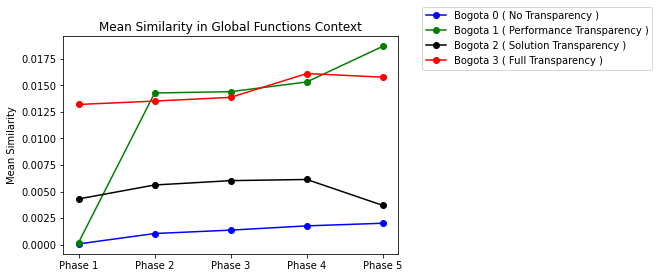

In [85]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [global_bogota0_phase1_mean, global_bogota0_phase2_mean, global_bogota0_phase3_mean, global_bogota0_phase4_mean, global_bogota0_phase5_mean]
y2 = [global_bogota1_phase1_mean, global_bogota1_phase2_mean, global_bogota1_phase3_mean, global_bogota1_phase4_mean, global_bogota1_phase5_mean]
y3 = [global_bogota2_phase1_mean, global_bogota2_phase2_mean, global_bogota2_phase3_mean, global_bogota2_phase4_mean, global_bogota2_phase5_mean]
y4 = [global_bogota3_phase1_mean, global_bogota3_phase2_mean, global_bogota3_phase3_mean, global_bogota3_phase4_mean, global_bogota3_phase5_mean]


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Mean Similarity in Global Functions Context")
plt.ylabel("Mean Similarity")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

[1.92789666473877e-05, 0.00010603431656063234, 0.0001349527665317139, 0.00016869095816464237, 0.00022170811644495856]


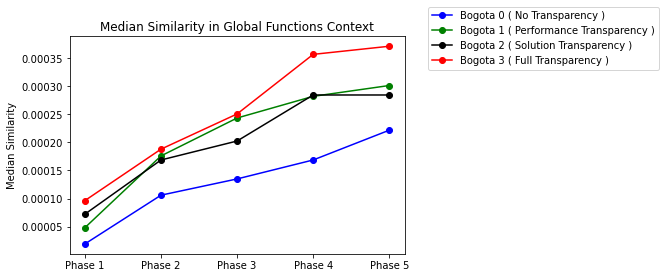

In [86]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [global_bogota0_phase1_median, global_bogota0_phase2_median, global_bogota0_phase3_median, global_bogota0_phase4_median, global_bogota0_phase5_median]
y2 = [global_bogota1_phase1_median, global_bogota1_phase2_median, global_bogota1_phase3_median, global_bogota1_phase4_median, global_bogota1_phase5_median]
y3 = [global_bogota2_phase1_median, global_bogota2_phase2_median, global_bogota2_phase3_median, global_bogota2_phase4_median, global_bogota2_phase5_median]
y4 = [global_bogota3_phase1_median, global_bogota3_phase2_median, global_bogota3_phase3_median, global_bogota3_phase4_median, global_bogota3_phase5_median]
print(y1)


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Median Similarity in Global Functions Context")
plt.ylabel("Median Similarity")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

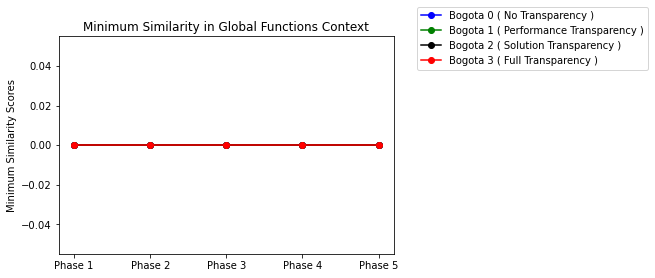

In [87]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [global_bogota0_phase1_min, global_bogota0_phase2_min, global_bogota0_phase3_min, global_bogota0_phase4_min, global_bogota0_phase5_min ]
y2 = [global_bogota1_phase1_min, global_bogota1_phase2_min, global_bogota1_phase3_min, global_bogota1_phase4_min, global_bogota1_phase5_min]
y3 = [global_bogota2_phase1_min, global_bogota2_phase2_min, global_bogota2_phase3_min, global_bogota2_phase4_min, global_bogota2_phase5_min ]
y4 = [global_bogota3_phase1_min, global_bogota3_phase2_min, global_bogota3_phase3_min, global_bogota3_phase4_min, global_bogota3_phase5_min]



x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line3 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line4 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line1 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line2 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Minimum Similarity in Global Functions Context")
plt.ylabel("Minimum Similarity Scores")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [88]:
df0_1 = subset_bogota0_phase1_all_only.rename(columns={'similarity':'b0-p1-similarity'}, inplace=False)
df0_2 = subset_bogota0_phase2_all_only.rename(columns={'similarity':'b0-p2-similarity'}, inplace=False)
df0_3 = subset_bogota0_phase3_all_only.rename(columns={'similarity':'b0-p3-similarity'}, inplace=False)
df0_4 = subset_bogota0_phase4_all_only.rename(columns={'similarity':'b0-p4-similarity'}, inplace=False)
df0_5 = subset_bogota0_phase5_all_only.rename(columns={'similarity':'b0-p5-similarity'}, inplace=False)

from functools import reduce

df0_merged_original = reduce(lambda x,y: pd.merge(x,y, on='user1', how='outer'), [df0_1, df0_2, df0_3, df0_4, df0_5])

/var/folders/gf/pvtbdsj96cz1tv7vmn1gq7j40000gn/T/ipykernel_5698/1214607353.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'user2_x'} in the result is deprecated and will raise a MergeError in a future version.
  df0_merged_original = reduce(lambda x,y: pd.merge(x,y, on='user1', how='outer'), [df0_1, df0_2, df0_3, df0_4, df0_5])


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

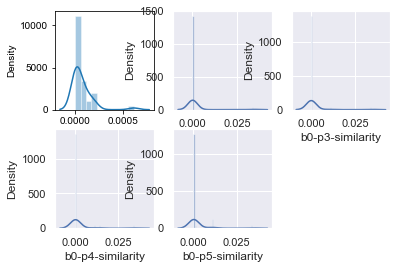

In [89]:
subset = df0_merged_original[["b0-p1-similarity", "b0-p2-similarity", "b0-p3-similarity", "b0-p4-similarity", "b0-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b0_o=[]
mean_list_b0_o=[]
min_list_b0_o=[]
max_list_b0_o=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b0_o.append(subset[column].describe().loc['50%'])
    mean_list_b0_o.append(subset[column].describe().loc['mean'])
    min_list_b0_o.append(subset[column].describe().loc['min'])
    max_list_b0_o.append(subset[column].describe().loc['max'])

In [90]:
df0_merged = df0_merged_original[["b0-p1-similarity", "b0-p2-similarity", "b0-p3-similarity", "b0-p4-similarity", "b0-p5-similarity"]].apply(np.log1p)
df0_merged

,b0-p1-similarity,b0-p2-similarity,b0-p3-similarity,b0-p4-similarity,b0-p5-similarity
0,0.000101,0.000145,0.000145,0.000511,0.000559
1,0.000024,0.000120,0.010896,0.010977,0.011010
2,0.000000,0.033419,0.033419,0.033419,0.033419
3,0.000000,0.000000,0.000000,0.000101,0.010977
4,0.000000,0.000092,0.000130,0.000135,0.000149
5,0.000019,0.000116,0.000116,0.013614,0.011082
6,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000193,0.000386,0.000641,0.000665,0.001012
8,0.000034,0.000202,0.000347,0.000390,0.000386
9,0.000193,0.000198,0.000198,0.000318,0.000434


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

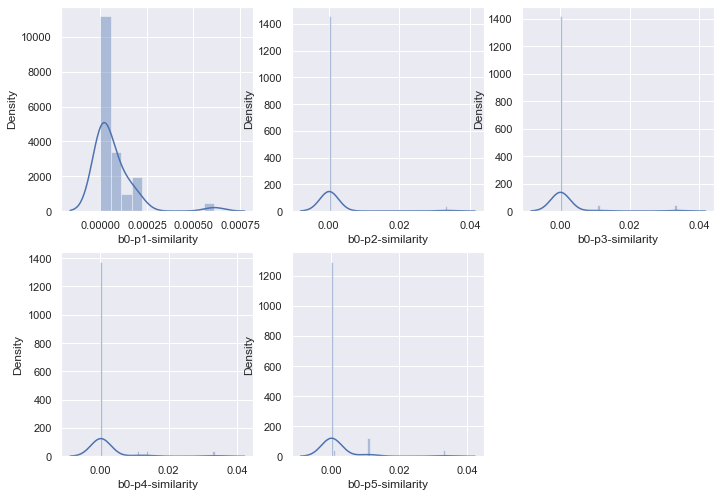

In [91]:
subset = df0_merged[["b0-p1-similarity", "b0-p2-similarity", "b0-p3-similarity", "b0-p4-similarity", "b0-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b0=[]
mean_list_b0=[]
min_list_b0=[]
max_list_b0=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b0.append(subset[column].describe().loc['50%'])
    mean_list_b0.append(subset[column].describe().loc['mean'])
    min_list_b0.append(subset[column].describe().loc['min'])
    max_list_b0.append(subset[column].describe().loc['max'])

In [92]:
from functools import reduce
pd.set_option('display.max_rows', None)
b1_p1 = subset_bogota1_phase1_all_only.rename(columns = {'similarity':'b1-p1-similarity'}, inplace = False)
b1_p2 = subset_bogota1_phase2_all_only.rename(columns = {'similarity':'b1-p2-similarity'}, inplace = False)
b1_p3 = subset_bogota1_phase3_all_only.rename(columns = {'similarity':'b1-p3-similarity'}, inplace = False)
b1_p4 = subset_bogota1_phase4_all_only.rename(columns = {'similarity':'b1-p4-similarity'}, inplace = False)
b1_p5 = subset_bogota1_phase5_all_only.rename(columns = {'similarity':'b1-p5-similarity'}, inplace = False)
data_frames = [b1_p1, b1_p2, b1_p3, b1_p4, b1_p5]
df1_merged_original = reduce(lambda  left, right: pd.merge(left, right,on=['user1'], how='left'), data_frames)
df1_merged_original

/var/folders/gf/pvtbdsj96cz1tv7vmn1gq7j40000gn/T/ipykernel_5698/698879051.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'user2_x'} in the result is deprecated and will raise a MergeError in a future version.
  df1_merged_original = reduce(lambda  left, right: pd.merge(left, right,on=['user1'], how='left'), data_frames)


,user1,user2_x,b1-p1-similarity,user2_y,b1-p2-similarity,user2_x,b1-p3-similarity,user2_y,b1-p4-similarity,user2,b1-p5-similarity
0,gasierram,all,0.000082,all,0.000082,all,0.000294,all,0.000294,all,0.000294
1,adamantwharf,all,0.000014,all,0.000014,all,0.000014,all,0.000014,all,0.000014
2,bdcajicam,all,0.000014,all,0.000014,all,0.000174,all,0.000174,all,0.000174
3,andfsanchezlem,all,0.000000,all,0.000000,all,0.000000,all,0.000000,all,0.000000
4,dfhincapiem,all,0.000000,all,0.000019,all,0.000019,all,0.000019,all,0.000019
5,helmeraac,all,0.000029,all,0.000072,all,0.000072,all,0.000164,all,0.000164
6,dasalgadob,all,0.000043,all,0.000043,all,0.000043,all,0.000043,all,0.000043
7,falperezgo,all,0.000101,all,0.009370,all,0.009370,all,0.009654,all,0.009683
8,djguzmanc,all,0.000164,all,0.000217,all,0.000241,all,0.000313,all,0.000313
9,gsuarezc04,all,0.000000,all,0.000198,all,0.000198,all,0.000198,all,0.000198


In [93]:
 subset_bogota1_phase1_all_only.reset_index(drop=True)

,user1,user2,similarity
0,gasierram,all,0.000082
1,adamantwharf,all,0.000014
2,bdcajicam,all,0.000014
3,andfsanchezlem,all,0.000000
4,dfhincapiem,all,0.000000
5,helmeraac,all,0.000029
6,dasalgadob,all,0.000043
7,falperezgo,all,0.000101
8,djguzmanc,all,0.000164
9,gsuarezc04,all,0.000000


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

[4.819741661846925e-05, 0.00017592057065741277, 0.0002433969539232697, 0.0002819548872180451, 0.0003012338538654328]


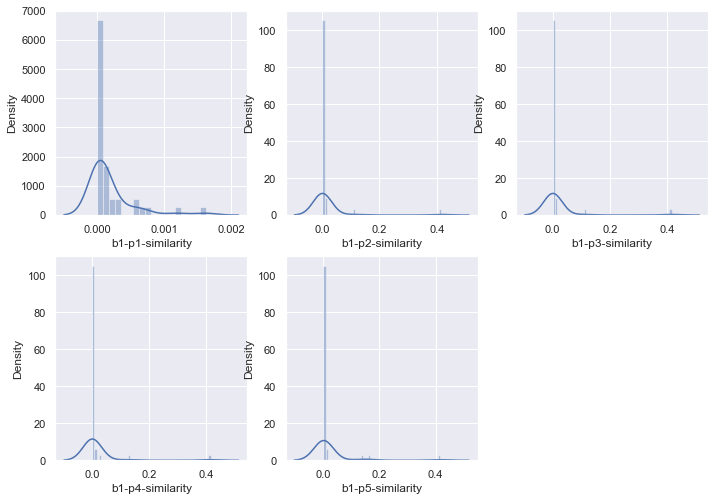

In [94]:
subset = df1_merged_original[["b1-p1-similarity", "b1-p2-similarity", "b1-p3-similarity", "b1-p4-similarity", "b1-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b1_o=[]
mean_list_b1_o=[]
max_list_b1_o=[]
min_list_b1_o=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b1_o.append(subset[column].describe().loc['50%'])
    mean_list_b1_o.append(subset[column].describe().loc['mean'])
    max_list_b1_o.append(subset[column].describe().loc['max'])
    min_list_b1_o.append(subset[column].describe().loc['min'])
print(median_list_b1_o)

In [95]:
df1_merged = df1_merged_original[["b1-p1-similarity", "b1-p2-similarity", "b1-p3-similarity", "b1-p4-similarity", "b1-p5-similarity"]].apply(np.log1p)
df1_merged

,b1-p1-similarity,b1-p2-similarity,b1-p3-similarity,b1-p4-similarity,b1-p5-similarity
0,0.000082,0.000082,0.000294,0.000294,0.000294
1,0.000014,0.000014,0.000014,0.000014,0.000014
2,0.000014,0.000014,0.000173,0.000173,0.000173
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000019,0.000019,0.000019,0.000019
5,0.000029,0.000072,0.000072,0.000164,0.000164
6,0.000043,0.000043,0.000043,0.000043,0.000043
7,0.000101,0.009326,0.009326,0.009608,0.009636
8,0.000164,0.000217,0.000241,0.000313,0.000313
9,0.000000,0.000198,0.000198,0.000198,0.000198


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

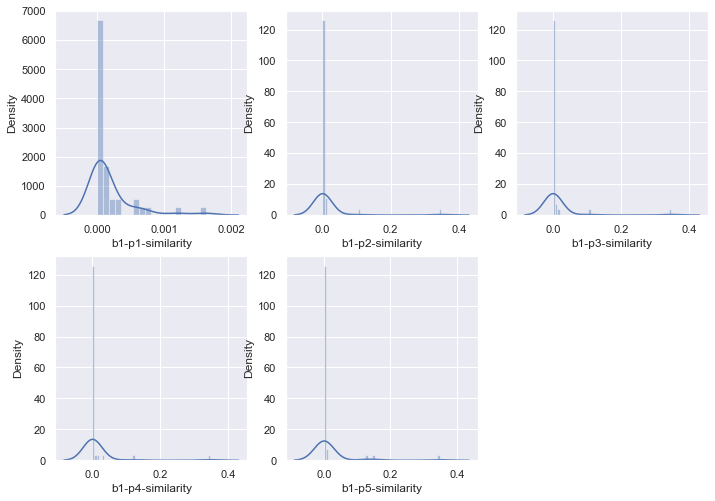

In [96]:
subset = df1_merged[["b1-p1-similarity", "b1-p2-similarity", "b1-p3-similarity", "b1-p4-similarity", "b1-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b1=[]
mean_list_b1=[]
max_list_b1=[]
min_list_b1=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b1.append(subset[column].describe().loc['50%'])
    mean_list_b1.append(subset[column].describe().loc['mean'])
    max_list_b1.append(subset[column].describe().loc['max'])
    min_list_b1.append(subset[column].describe().loc['min'])

In [97]:
from functools import reduce
b2_p1 = subset_bogota2_phase1_all_only.rename(columns = {'similarity':'b2-p1-similarity'}, inplace = False)
b2_p2 = subset_bogota2_phase2_all_only.rename(columns = {'similarity':'b2-p2-similarity'}, inplace = False)
b2_p3 = subset_bogota2_phase3_all_only.rename(columns = {'similarity':'b2-p3-similarity'}, inplace = False)
b2_p4 = subset_bogota2_phase4_all_only.rename(columns = {'similarity':'b2-p4-similarity'}, inplace = False)
b2_p5 = subset_bogota2_phase5_all_only.rename(columns = {'similarity':'b2-p5-similarity'}, inplace = False)
data_frames = [b2_p1, b2_p2, b2_p3, b2_p4, b2_p5]
df2_merged_original = reduce(lambda  left, right: pd.merge(left, right,on=['user1'], how='outer'), data_frames)


/var/folders/gf/pvtbdsj96cz1tv7vmn1gq7j40000gn/T/ipykernel_5698/1132933561.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'user2_x'} in the result is deprecated and will raise a MergeError in a future version.
  df2_merged_original = reduce(lambda  left, right: pd.merge(left, right,on=['user1'], how='outer'), data_frames)


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

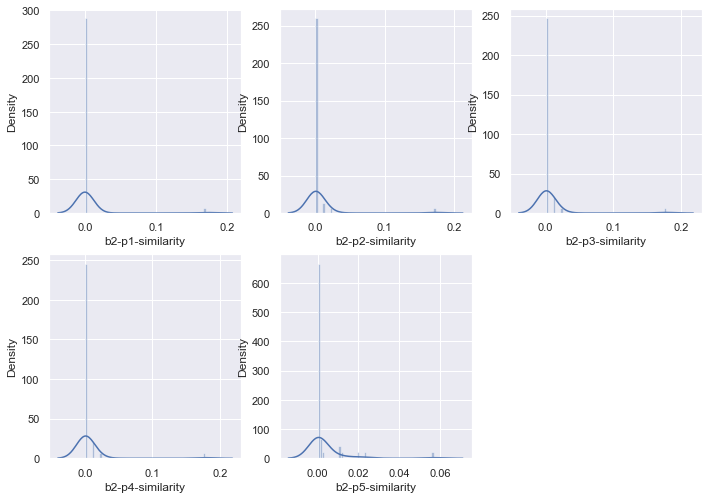

In [98]:
subset = df2_merged_original[["b2-p1-similarity", "b2-p2-similarity", "b2-p3-similarity", "b2-p4-similarity", "b2-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b2_o=[]
mean_list_b2_o=[]
min_list_b2_o=[]
max_list_b2_o=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b2_o.append(subset[column].describe().loc['50%'])
    mean_list_b2_o.append(subset[column].describe().loc['mean'])
    min_list_b2_o.append(subset[column].describe().loc['min'])
    max_list_b2_o.append(subset[column].describe().loc['max'])

In [99]:
df2_merged = df2_merged_original[["b2-p1-similarity", "b2-p2-similarity", "b2-p3-similarity", "b2-p4-similarity", "b2-p5-similarity"]].apply(np.log1p)
df2_merged

,b2-p1-similarity,b2-p2-similarity,b2-p3-similarity,b2-p4-similarity,b2-p5-similarity
0,0.000077,0.000077,0.010838,0.010838,0.010838
1,0.000019,0.000019,0.000053,0.000053,0.000053
2,0.000024,0.000024,0.000024,0.000024,0.000024
3,0.000284,0.000255,0.000255,0.000284,0.000284
4,0.000000,0.000000,0.000000,0.000352,0.000424
5,0.000048,0.000053,0.000092,0.000092,0.000092
6,0.000439,0.000491,0.000679,0.000978,0.000978
7,0.000255,0.000255,0.000255,0.000255,0.000255
8,0.000125,0.000130,0.000193,0.000193,0.000193
9,0.000000,0.000000,0.000000,0.000000,0.000000


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

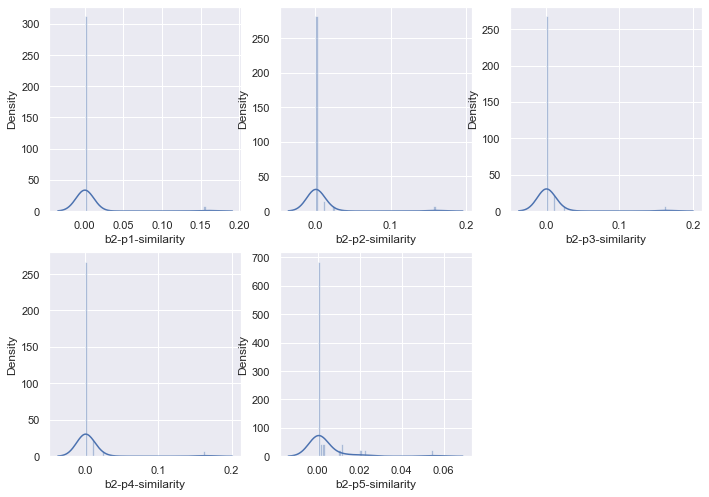

In [100]:
subset = df2_merged[["b2-p1-similarity", "b2-p2-similarity", "b2-p3-similarity", "b2-p4-similarity", "b2-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b2=[]
mean_list_b2=[]
min_list_b2=[]
max_list_b2=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b2.append(subset[column].describe().loc['50%'])
    mean_list_b2.append(subset[column].describe().loc['mean'])
    min_list_b2.append(subset[column].describe().loc['min'])
    max_list_b2.append(subset[column].describe().loc['max'])

In [101]:
from functools import reduce
b3_p1 = subset_bogota3_phase1_all_only.rename(columns = {'similarity':'b3-p1-similarity'}, inplace = False)
b3_p2 = overall_phase2_bogota3_all_only.rename(columns = {'similarity':'b3-p2-similarity'}, inplace = False)
b3_p3 = subset_bogota3_phase3_all_only.rename(columns = {'similarity':'b3-p3-similarity'}, inplace = False)
b3_p4 = overall_phase4_bogota3_all_only.rename(columns = {'similarity':'b3-p4-similarity'}, inplace = False)
b3_p5 = overall_phase5_bogota3_all_only.rename(columns = {'similarity':'b3-p5-similarity'}, inplace = False)
data_frames = [b3_p1, b3_p2, b3_p3, b3_p4, b3_p5]
df3_merged_original = reduce(lambda  left, right: pd.merge(left, right,on=['user1'], how='outer'), data_frames)

/var/folders/gf/pvtbdsj96cz1tv7vmn1gq7j40000gn/T/ipykernel_5698/2153003912.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'user2_x'} in the result is deprecated and will raise a MergeError in a future version.
  df3_merged_original = reduce(lambda  left, right: pd.merge(left, right,on=['user1'], how='outer'), data_frames)


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

[9.63948332369385e-05, 0.00018796992481203009, 0.0002506265664160401, 0.00035666088297667243, 0.00037112010796221324]


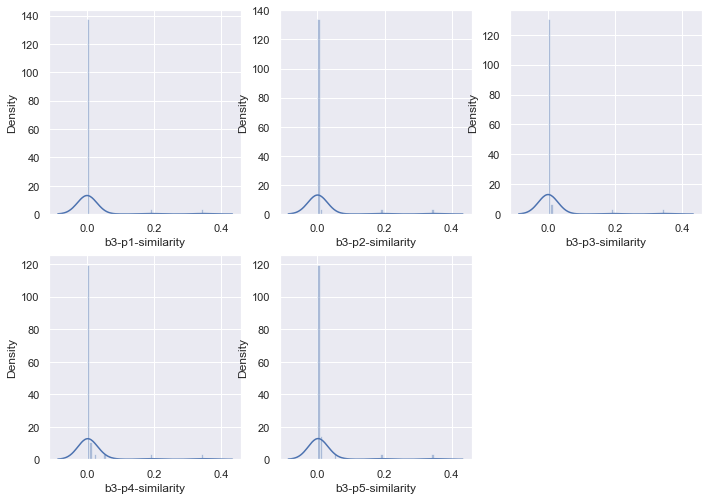

In [102]:
subset = df3_merged_original[["b3-p1-similarity", "b3-p2-similarity", "b3-p3-similarity", "b3-p4-similarity", "b3-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b3_o=[]
mean_list_b3_o=[]
min_list_b3_o=[]
max_list_b3_o=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b3_o.append(subset[column].describe().loc['50%'])
    mean_list_b3_o.append(subset[column].describe().loc['mean'])
    max_list_b3_o.append(subset[column].describe().loc['max'])
    min_list_b3_o.append(subset[column].describe().loc['min'])
    
print(median_list_b3_o)

In [103]:
df3_merged = df3_merged_original[["b3-p1-similarity", "b3-p2-similarity", "b3-p3-similarity", "b3-p4-similarity", "b3-p5-similarity"]].apply(np.log1p)
df3_merged

,b3-p1-similarity,b3-p2-similarity,b3-p3-similarity,b3-p4-similarity,b3-p5-similarity
0,0.000039,0.000072,0.000072,0.000125,0.000125
1,0.000077,0.000646,0.011963,0.012277,0.012296
2,0.000077,0.000207,0.000251,0.000251,0.000251
3,0.000544,0.009875,0.009875,0.009875,0.009875
4,0.297391,0.297420,0.297420,0.297434,0.297434
5,0.000092,0.000188,0.000506,0.000506,0.011206
6,0.000280,0.000275,0.000275,0.000270,0.000270
7,0.000000,0.001729,0.001729,0.001743,0.001743
8,0.000159,0.000304,0.000405,0.000405,0.000429
9,0.000077,0.000207,0.000299,0.000429,0.000424


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

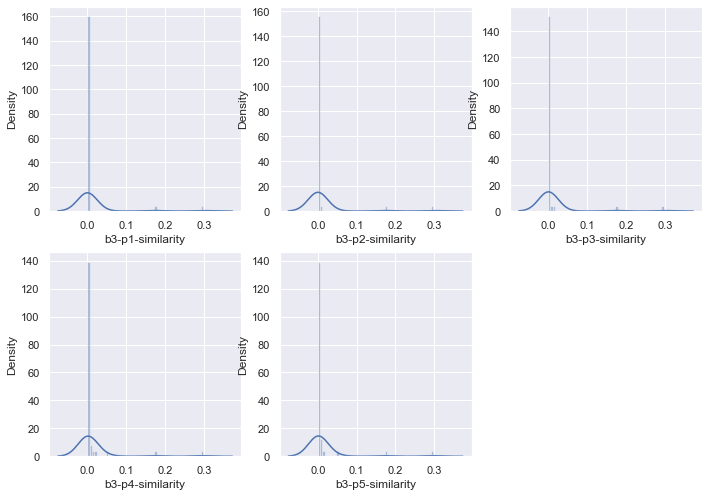

In [104]:
subset = df3_merged[["b3-p1-similarity", "b3-p2-similarity", "b3-p3-similarity", "b3-p4-similarity", "b3-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b3=[]
mean_list_b3=[]
min_list_b3=[]
max_list_b3=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b3.append(subset[column].describe().loc['50%'])
    mean_list_b3.append(subset[column].describe().loc['mean'])
    max_list_b3.append(subset[column].describe().loc['max'])
    min_list_b3.append(subset[column].describe().loc['min'])

[1.92789666473877e-05, 0.00010603431656063234, 0.0001349527665317139, 0.00016869095816464237, 0.00022170811644495856]
[4.819741661846925e-05, 0.00017592057065741277, 0.0002433969539232697, 0.0002819548872180451, 0.0003012338538654328]
[7.229612492770387e-05, 0.00016869095816464237, 0.00020242914979757084, 0.0002843647580489686, 0.0002843647580489686]
[0.0, 0.0, 0.0, 0.0, 0.0]


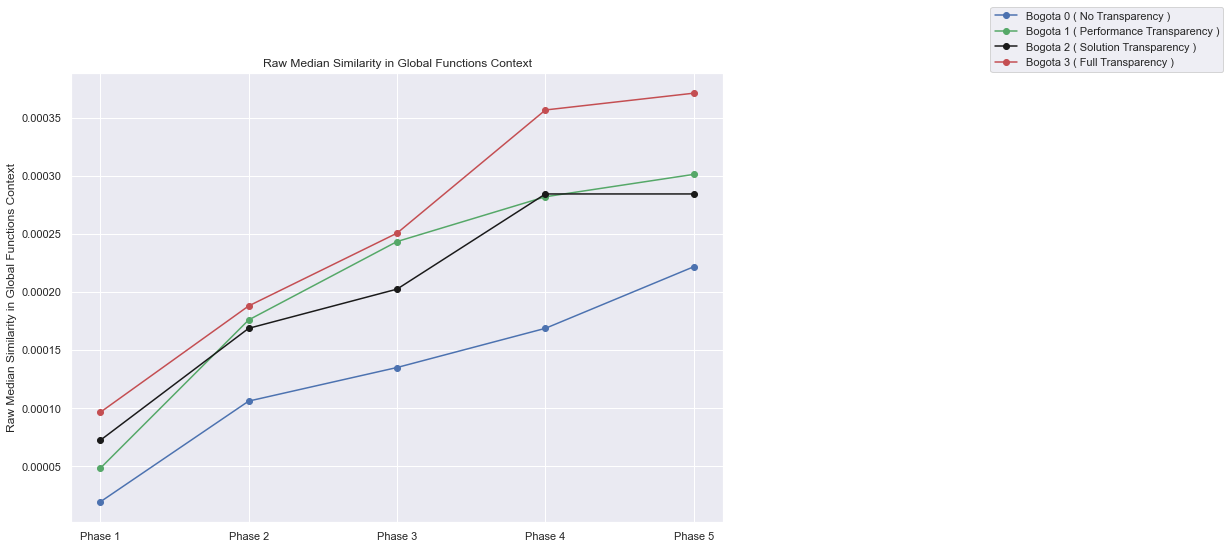

In [105]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1_o = median_list_b0_o
y2_o = median_list_b1_o
print(y1_o)
print(y2_o)
y3_o = median_list_b2_o
print(y3_o)
y4_o = median_list_b3_o
print(y4)

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1_o,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2_o,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3_o,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4_o,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Raw Median Similarity in Global Functions Context")
plt.ylabel("Raw Median Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

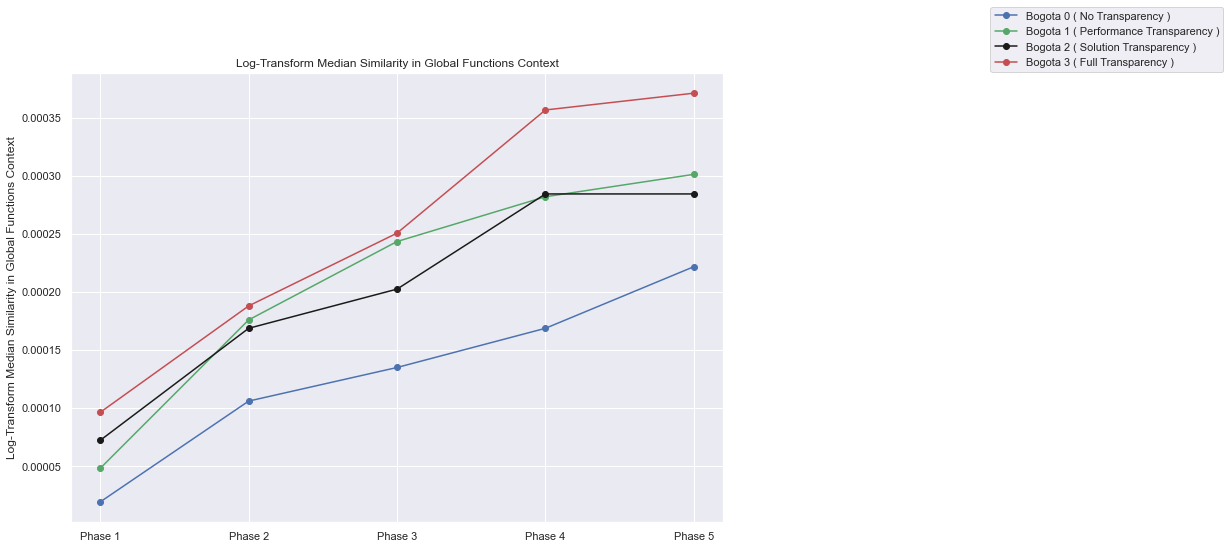

In [106]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = median_list_b0
y2 = median_list_b1
y3 = median_list_b2
y4 = median_list_b3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Log-Transform Median Similarity in Global Functions Context")
plt.ylabel("Log-Transform Median Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

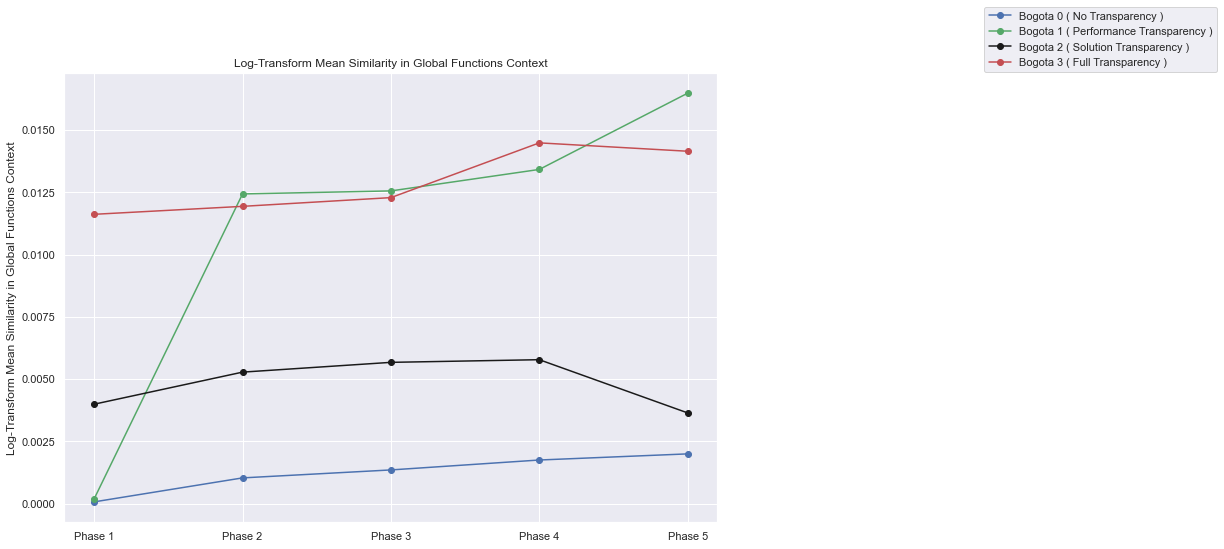

In [107]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = mean_list_b0
y2 = mean_list_b1
y3 = mean_list_b2
y4 = mean_list_b3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Log-Transform Mean Similarity in Global Functions Context")
plt.ylabel("Log-Transform Mean Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

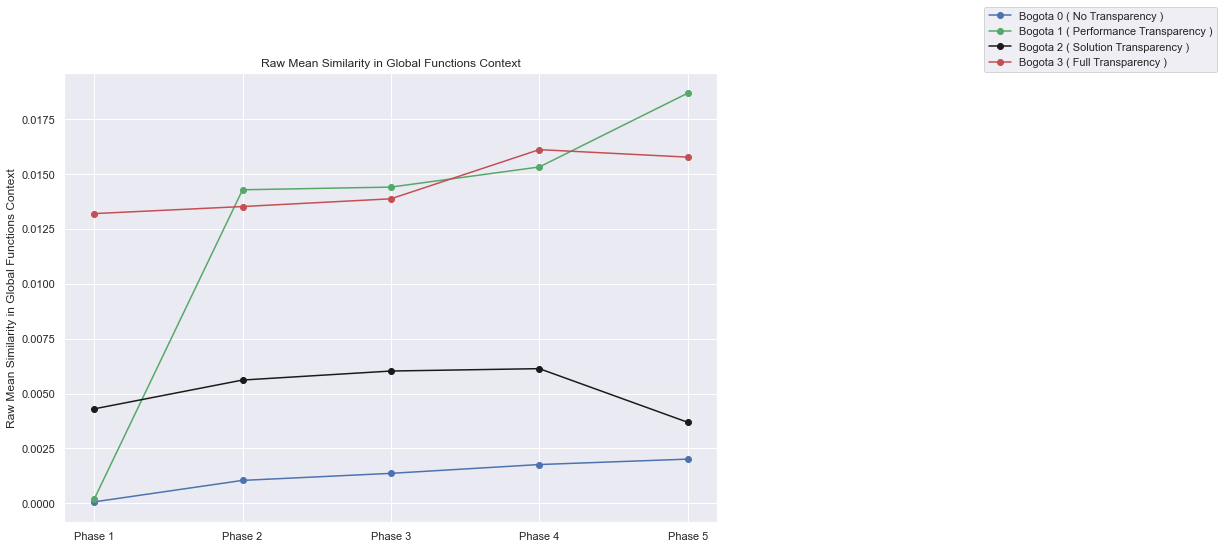

In [108]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = mean_list_b0_o
y2 = mean_list_b1_o
y3 = mean_list_b2_o
y4 = mean_list_b3_o


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Raw Mean Similarity in Global Functions Context")
plt.ylabel("Raw Mean Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

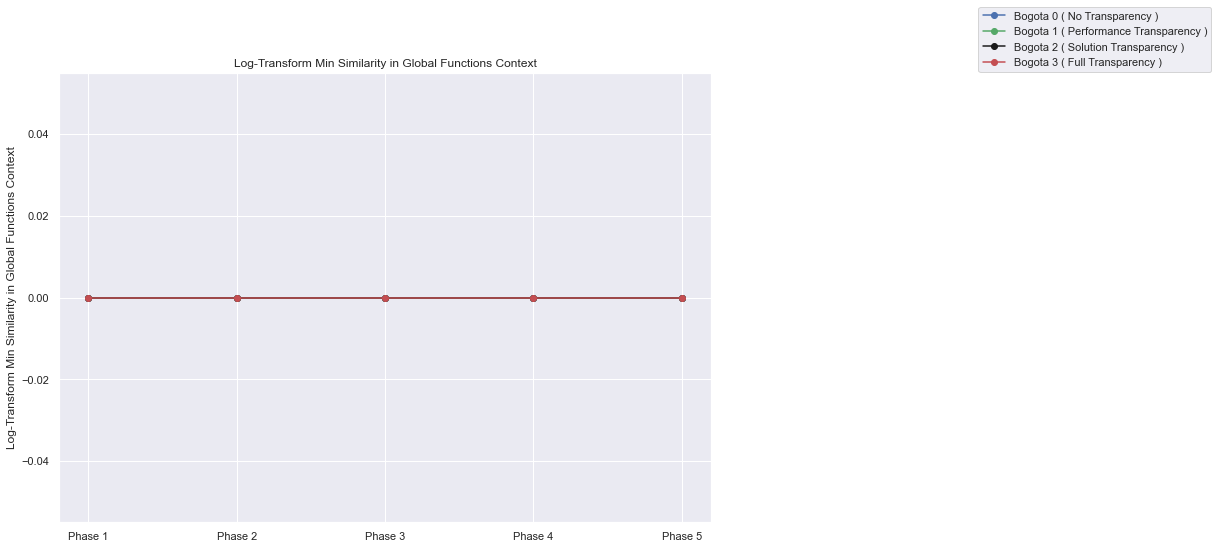

In [109]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = min_list_b0
y2 = min_list_b1
y3 = min_list_b2
y4 = min_list_b3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Log-Transform Min Similarity in Global Functions Context")
plt.ylabel("Log-Transform Min Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

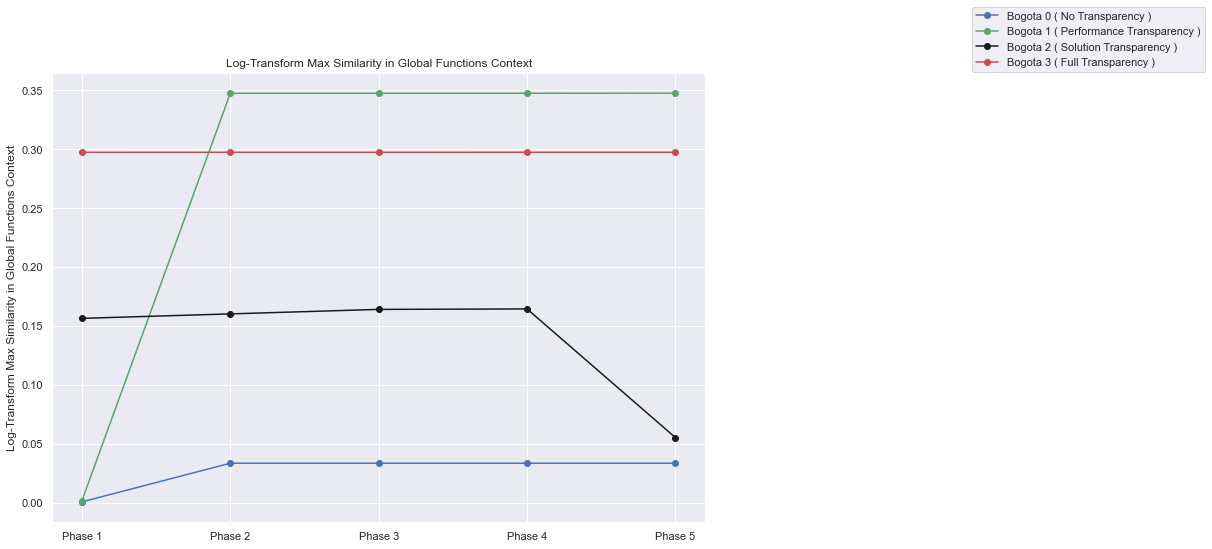

In [110]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = max_list_b0
y2 = max_list_b1
y3 = max_list_b2
y4 = max_list_b3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Log-Transform Max Similarity in Global Functions Context")
plt.ylabel("Log-Transform Max Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [111]:
%store overall_phase1
%store overall_phase2
%store overall_phase3
%store overall_phase4
%store overall_phase5
%store df_all
%store subset_bogota0_phase1
%store subset_bogota0_phase2
%store subset_bogota0_phase3
%store subset_bogota0_phase4
%store subset_bogota0_phase5
%store subset_bogota1_phase1
%store subset_bogota1_phase2
%store subset_bogota1_phase3
%store subset_bogota1_phase4
%store subset_bogota1_phase5
%store subset_bogota2_phase1
%store subset_bogota2_phase2
%store subset_bogota2_phase3
%store subset_bogota2_phase4
%store subset_bogota2_phase5
%store subset_bogota3_phase1
%store overall_phase2_bogota3
%store overall_phase3_bogota3
%store overall_phase4_bogota3
%store overall_phase5_bogota3

Stored 'overall_phase1' (DataFrame)
Stored 'overall_phase2' (DataFrame)
Stored 'overall_phase3' (DataFrame)
Stored 'overall_phase4' (DataFrame)
Stored 'overall_phase5' (DataFrame)


UsageError: Unknown variable 'df_all'
